# Pymaceuticals Inc.
---

### Analysis

- appears that Infubimol and Ceftamin are less succesful at suppressing tumors with the timelines given
-Ramicane and Capomulin had the smallest average tumor size indicating they are the two most effective treatments
-The correlation between mouse weight and average tumor volume is 0.84 indicating that weight and tumor volume are fairly closely related
-Ramicane and Capomulin had the most observed treatments indicating the data could be slightly skewed from the higher sample count
-Infubinol had an outlier that needs to be looked at

In [1]:
%matplotlib widget

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_total= mouse_study["Mouse ID"].nunique()
print(mouse_total)

249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates_rows= mouse_study[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"],keep=False)]
duplicate_ids=duplicates_rows["Mouse ID"].unique()
print(duplicate_ids)

['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice=mouse_study[mouse_study["Mouse ID"].isin(duplicate_ids)]
print(duplicate_mice)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse=mouse_study[~mouse_study["Mouse ID"].isin(duplicate_ids)]
cleaned_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_total=cleaned_mouse["Mouse ID"].nunique()
print(clean_total)

248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
drugs= cleaned_mouse.groupby("Drug Regimen")
summary_stats=pd.DataFrame({
    "Mean Tumor Volume":drugs["Tumor Volume (mm3)"].mean(),
    "Median Tumor Volume": drugs["Tumor Volume (mm3)"].median(),
    "Tumor Volume Variance": drugs["Tumor Volume (mm3)"].var(),
    "Tumor Volume Std. Dev.": drugs["Tumor Volume (mm3)"].std(),
    "Tumor Volume SEM": drugs["Tumor Volume (mm3)"].sem()
})
print(summary_stats)

              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_drugs=cleaned_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "sem"]).rename(columns={
    "mean":"Mean Tumor Volume",
    "median": "Median Tumor Volume",
    "var": "Tumor Volume Variance",
    "std": "Tumor Volume Std. Dev.",
    "sem": "Tumor Volume SEM"
})
print(summary_drugs)

              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume SEM  
Drug Regimen      

## Bar and Pie Charts

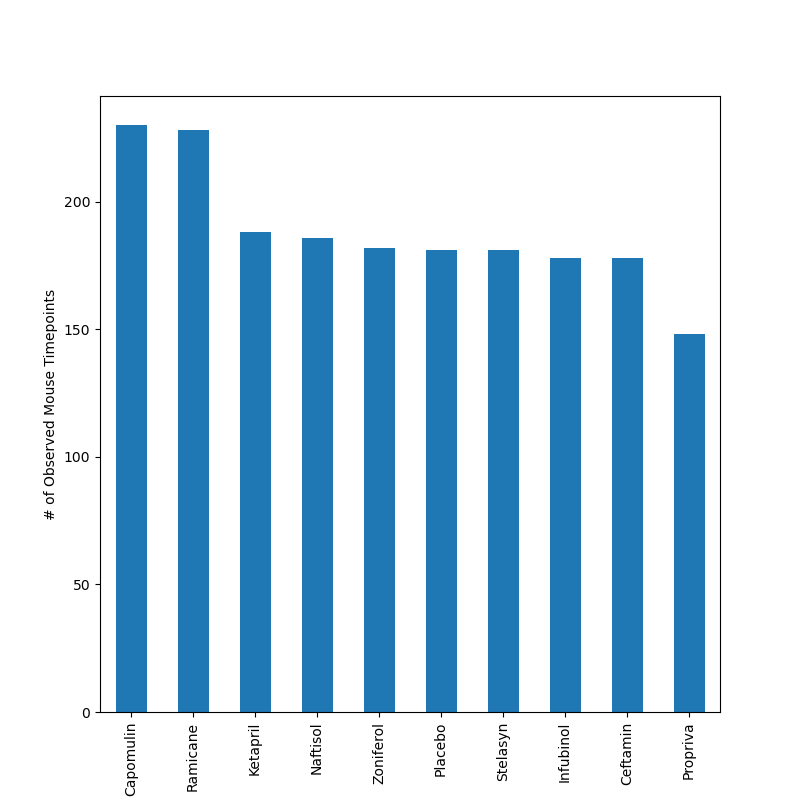

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_count=cleaned_mouse["Drug Regimen"].value_counts()
regimen_count.plot(kind="bar",xlabel="Drug Regimen",ylabel="# of Observed Mouse Timepoints", figsize=(8,8))
plt.show()

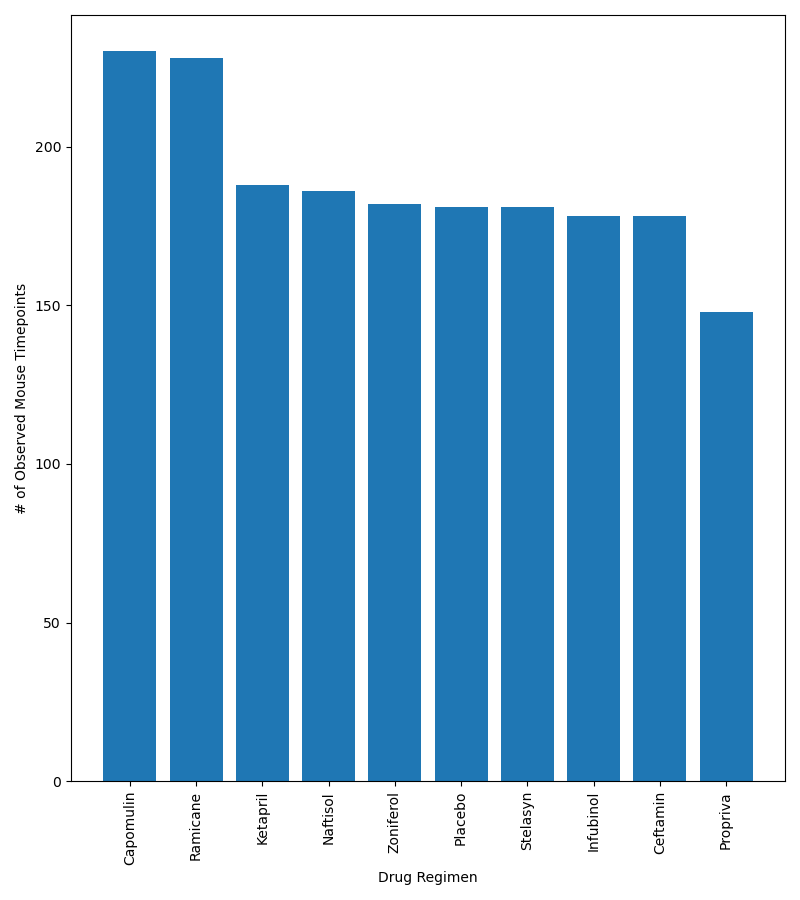

In [63]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_count=cleaned_mouse["Drug Regimen"].value_counts()
plt.figure(figsize=(8,9))
plt.bar(regimen_count.index, regimen_count.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

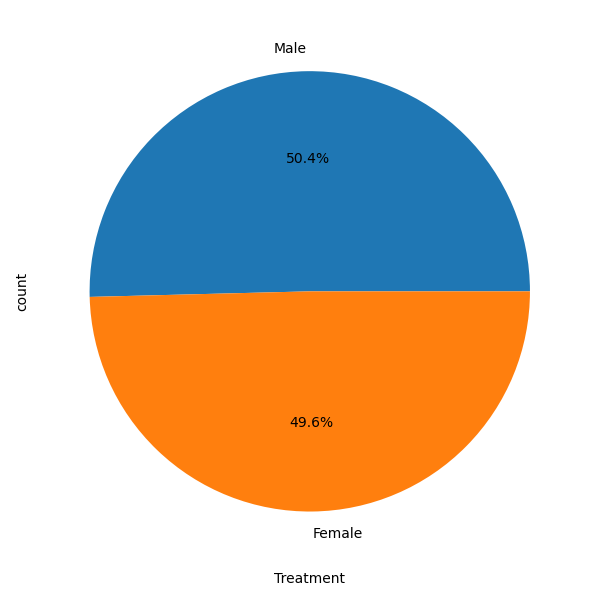

In [61]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
gender_split=cleaned_mouse.drop_duplicates(subset="Mouse ID")[["Mouse ID", "Sex"]]

# Get the unique mice with their gender
gender_count=gender_split["Sex"].value_counts()

# Make the pie chart
gender_count.plot(kind="pie",autopct="%1.1f%%",startangle=0,figsize=(6,6))
plt.ylabel("count")
plt.tight_layout()
plt.show()


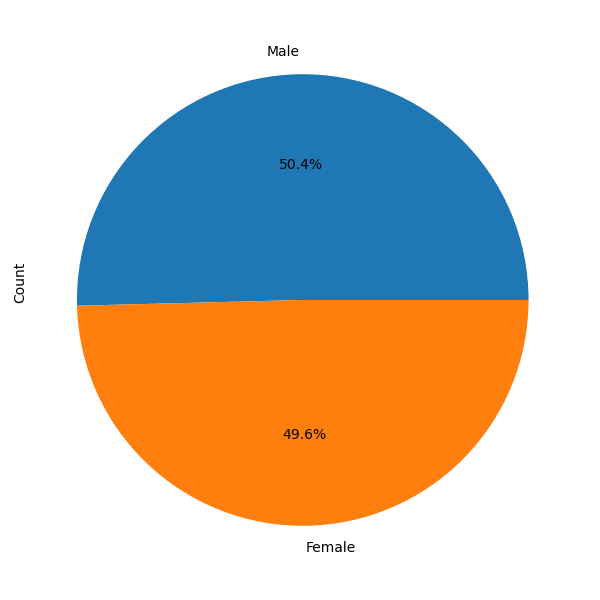

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_count=gender_split["Sex"].value_counts()

# Make the pie chart
plt.figure(figsize=(6,6))
plt.pie(
    gender_count.values,
    labels=gender_count.index,
    autopct="%1.1f%%",
    startangle=0,
    
)
plt.text(-1.25, 0, "Count",rotation=90, fontsize=10, ha="center", color="black")
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp=cleaned_mouse.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor=pd.merge(last_tp,cleaned_mouse, on=["Mouse ID","Timepoint"])
# Filter for Capomulin, Ramicane, Infubinol, and Ceftamin
chosen_sample=["Capomulin","Ramicane", "Infubinol","Ceftamin"]
filtered_tumor=final_tumor[final_tumor["Drug Regimen"].isin(chosen_sample)]
filtered_tumor[["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]]


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
3,a275,Ceftamin,45,62.999356
6,a411,Ramicane,45,38.407618
7,a444,Ramicane,45,43.047543
...,...,...,...,...
238,y769,Ceftamin,45,68.594745
239,y793,Capomulin,45,31.896238
240,y865,Ceftamin,45,64.729837
244,z578,Ramicane,45,30.638696


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin","Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_size_data={}
for treatment in treatments:
    treatment_results=filtered_tumor[filtered_tumor["Drug Regimen"] == treatment]
    tumor_size=treatment_results["Tumor Volume (mm3)"]
    # tumor_size_data.append(tumor_size.values)

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    q1=np.percentile(tumor_size, 25)
    q3=np.percentile(tumor_size, 75)
    iqr=q3-q1

    # Locate the rows which contain mice on each drug and get the tumor volumes
    

    # # add subset
    subset=treatment_results[["Mouse ID","Tumor Volume (mm3)","Timepoint"]]

    # # Determine outliers using upper and lower bounds
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3+(1.5*iqr)
    outliers =tumor_size[(tumor_size < lower_bound)|(tumor_size > upper_bound)]
    tumor_size_data[treatment]=outliers
for treatment, outliers in tumor_size_data.items():
    print(f"{treatment}:{outliers}")


    

Capomulin:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin:Series([], Name: Tumor Volume (mm3), dtype: float64)


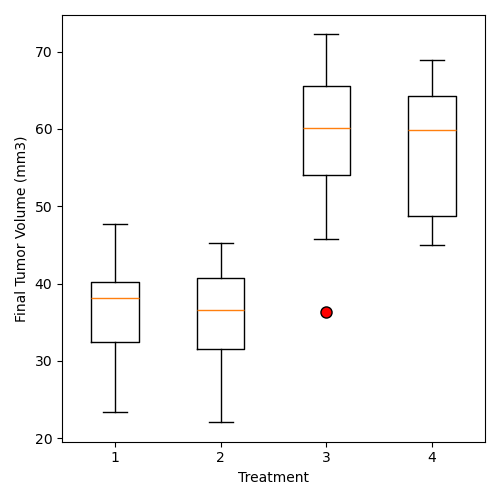

In [60]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
treatments=["Capomulin","Ramicane", "Infubinol","Ceftamin"]
tumor_volume_data=[filtered_tumor[filtered_tumor["Drug Regimen"]== treatment]["Tumor Volume (mm3)"]
                   for treatment in treatments]
    
plt.figure(figsize=(5, 5))
plt.boxplot(tumor_volume_data, flierprops={"markerfacecolor": "red", "markersize": 8})
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Treatment")
# plt.xticks("Drug Regimen")
plt.tight_layout()

## Line and Scatter Plots

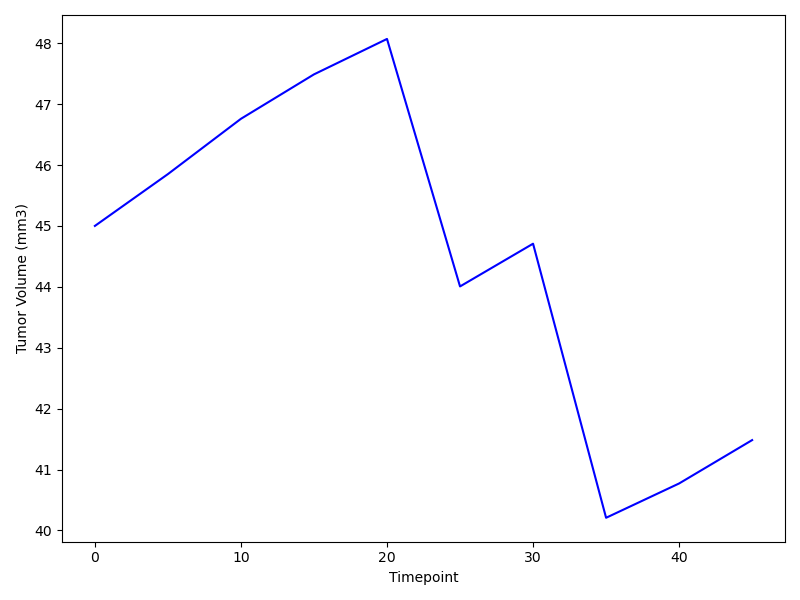

In [46]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo_mouse=cleaned_mouse[(cleaned_mouse["Drug Regimen"]== "Capomulin")]
capo_mouse_data=cleaned_mouse[cleaned_mouse["Mouse ID"]=="l509"]
plt.figure(figsize=(8, 6))
plt.plot(
    capo_mouse_data["Timepoint"], 
    capo_mouse_data["Tumor Volume (mm3)"], 
    linestyle="-", color="blue"
)

plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout()

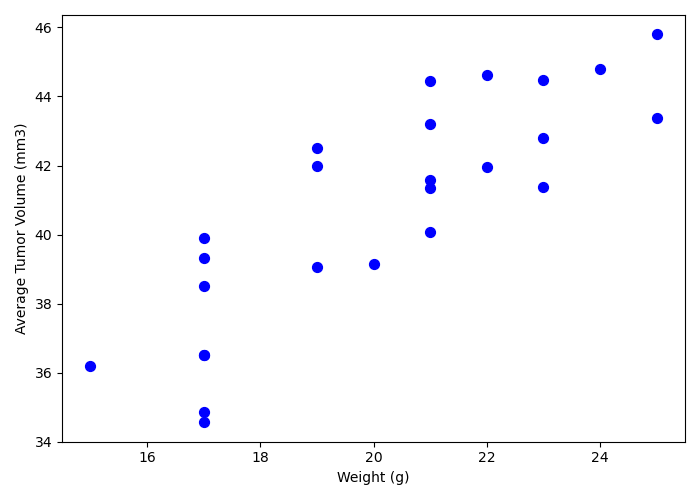

In [50]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_mouse[cleaned_mouse["Drug Regimen"] == "Capomulin"]
capomulin_avg_tumor = capomulin_data.groupby("Mouse ID").agg(
    Avg_Tumor_Volume=("Tumor Volume (mm3)", "mean"),
    Weight=("Weight (g)", "first")
).reset_index()
plt.figure(figsize=(7, 5))
plt.scatter(
    capomulin_avg_tumor["Weight"], 
    capomulin_avg_tumor["Avg_Tumor_Volume"], 
    color="blue", s=50
)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.tight_layout()
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


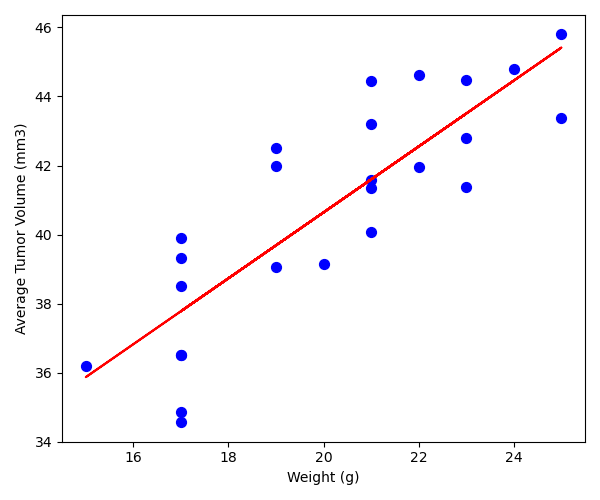

In [59]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_mouse[cleaned_mouse["Drug Regimen"] == "Capomulin"]
capomulin_avg_tumor = capomulin_data.groupby("Mouse ID").agg(
    Avg_Tumor_Volume=("Tumor Volume (mm3)", "mean"),
    Weight=("Weight (g)", "first")
).reset_index()
weight=capomulin_avg_tumor["Weight"]
avg_tumor=capomulin_avg_tumor["Avg_Tumor_Volume"]
correlation=np.corrcoef(weight,avg_tumor)[0,1]
print(f"The correlation between mouse weight and average tumor volume is {correlation:.2f}")
slope, intercept, r_value, p_value, std_err = st.linregress(weight, avg_tumor)
regression_line=slope*weight+intercept
plt.figure(figsize=(6, 5))
plt.scatter(weight, avg_tumor, color="blue", s=50, label="Data")
plt.plot(weight, regression_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.tight_layout()
plt.show()